### **Aim**  
The motive of this assignment is to make predictions using **Linear Regression**. To make sure you truly understand how the underlying algorithm works, you are to implement it from scratch.

### Generating the dataset  
Run the cell below to create the dataset. It further splits the available data into training and testing. Please do not edit this cell.


In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=20, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

### Visualizing the data  
Use `matplotlib` to visualize the given data.

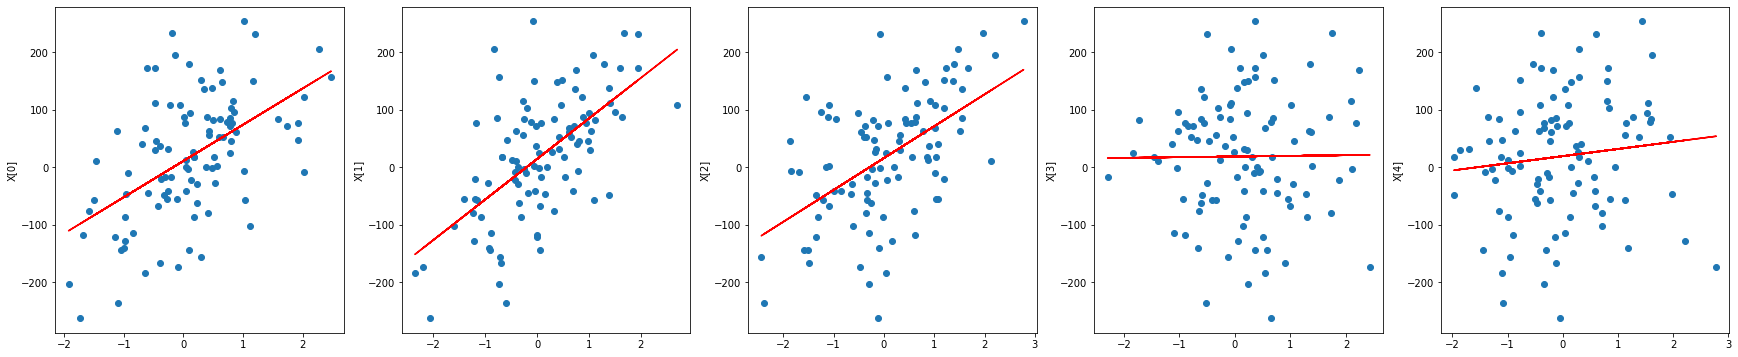

In [12]:
import matplotlib.pyplot as plt
import numpy as np

figure, axis = plt.subplots(1,5, figsize=(30,6))
for i in range(5):
  axis[i].scatter(X[:,i],y)
  m, b = np.polyfit(X[:,i], y, 1)
  axis[i].plot(X[:,i],m*X[:,i]+b, color = "red")
  axis[i].set(ylabel = "X[{}]".format(i))

# Your code here

You should be able to see the linear relations between `y` and the features in vector `X`.

### Gradient Descent Review  
1. ####  Cost function
Define the `cost function` to measure the difference between predictions and target outputs. Here, we are working with first degree polynomial, so derivatives are easy to calculate. ( Linear function `y = wx +b` )  

$$Error = \frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N (y_i - (x_iw+b))^2 $$  

  where `N` is the number of samples  
    


2. #### Compute the derivative
$$\frac{\delta Error}{\delta w} = \frac{2}{N}\sum_{i=1}^N -x_i(y_i -(m  x_i +b ))  $$
$$\frac{\delta Error}{\delta b} = \frac{2}{N}\sum_{i=1}^N -(y_i -(m  x_i +b ))  $$
3. <h4>Update current parameters</h4>
$$ w:= w- learning\_rate \cdot \frac{\delta Error}{\delta w}   $$ 
$$ b:= b- learning\_rate \cdot \frac{\delta Error}{\delta b}   $$ 
4. <h4>Repeat until it fits good enough</h4>


### Model definition

Complete the functions in the class below. Hints provided at appropriate places.

In [13]:
import numpy as np

class LinearRegression:

    # The __init__ is called when we make any object of our class. Here, you are to specify the default values for 
    # Learning Rate, Number of Iterations, Weights and Biases. It doesn't return anything.
    # Hint: Google what a `self pointer` is and figure out how it can be used here.
    def __init__(self, learning_rate=0.001, n_iters=1000):
        # Your code here
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.biases = None
        # pass  # Uncomment this when you're done with this function


    # The following function would be the heart of the model. This is where the training would happen. 
    # You're supposed to iterate and keep on updating the weights and biases according to the steps of Gradient Descent.

    def fit(self, X, y,cost,w8s):
        # Gradient Descent code goes here
        self.weights = np.zeros((X.shape[1],1))
        self.biases = 0
        y2 = np.array([[item] for item in y])
        
        for itx in range(self.n_iters):
          hyp = np.dot(X,self.weights)
          error_w = 2/y.size*np.dot(np.transpose(X),(hyp-y2))
          error_b = 2/y.size*np.sum((hyp-y2))
          J = 1/y.size*np.sum(np.square(y2-hyp))
          cost.append(J)
          w8s.append(self.weights)
          # if itx<5 or itx>self.n_iters-5:
            # print(self.weights)
          self.weights -= self.learning_rate*error_w
          self.biases -= self.learning_rate*error_b

          
          
        # pass  # Uncomment this when you're done with this function
        
        
    # This function will be called after our model has been trained and we are predicting on unseen data
    # What is our prediction? Just return that
    def predict(self, X):
        # Code goes here
        return np.dot(X,self.weights) + self.biases
        # pass  # Uncomment this when you're done with this function

### Initializing, Training & Predictions

Final Cost: 486.93051056532363 



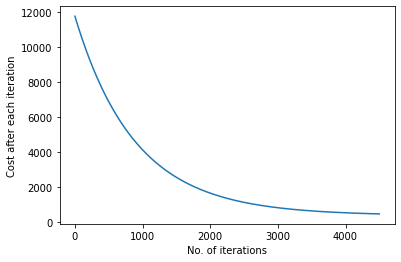

In [17]:
# Now, we make an object of our custom class.
regressor = LinearRegression(0.0003,4500) # You may pass the custom parameters or let the default values take it ahead
cost = []
weights = []
# Call the fit method on the object to train (pass appropriate part of dataset)
regressor.fit(X_train,y_train, cost, weights)
# X = np.array(weights)
J = np.array(cost)
plt.plot(J)
plt.xlabel("No. of iterations")
plt.ylabel("Cost after each iteration")
print("Final Cost:", J[-1],"\n")

# Now, let's see our what our model predicts
predictions = regressor.predict(X_test) # pass appropriate part of dataset

### Evaluate the model   

Return [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) & [R2 Score](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy) from the functions below.

In [18]:
def mean_squared_error(y_true, y_pred):
       # return the mean squared error
       y2 = np.array([[item] for item in y_true])
       return np.sum(np.square(y2-y_pred))/y_true.size
      #  pass  # Uncomment this when you're done with this function


def r2_score(y_true, y_pred):
      # return the r2 score
      mean = np.sum(y_true)/y_true.size
      sst = np.sum(np.square(y_pred-mean))/y_true.size
      mse = mean_squared_error(y_true,y_pred)
      # print(sst,'\n',mse)
      return 1 - mse/sst
      # pass  # Uncomment this when you're done with this function
          
print("For test dataset:\n")

mse = mean_squared_error(y_test,predictions) # Pass appropriate parts of dataset
print("MSE:", mse)

accu = r2_score(y_test,predictions) # Pass appropriate parts of dataset
print("Accuracy:", accu)

For test dataset:

MSE: 718.7287155560354
Accuracy: 0.9158877052983698


In [19]:
p = regressor.predict(X_train)
print("For training dataset:")
mse = mean_squared_error(y_train,p) # Pass appropriate parts of dataset
print("\nMSE:", mse)

accu = r2_score(y_train,p) # Pass appropriate parts of dataset

print("Accuracy:", accu)


For training dataset:

MSE: 729.0582865893924
Accuracy: 0.9245230975899686
